Licensed under the MIT License.

Copyright (c) 2021-2025. All rights reserved.

# LGBM Regression Baseline

* Using default LGBM settings, the performance serves as the baseline result to compare with later param tuning performance
* The performance is evaluated through cross validation

In [14]:
import pandas as pd
import numpy as np
from tqdm import tqdm
# tqdm._instances.clear()  # run this when tqdm shows multiple bars in your notebook
from matplotlib import pylab as plt
from matplotlib.offsetbox import AnchoredText

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

In [15]:
df = pd.read_pickle('../crystal_ball/data_collector/structured_data/sales.pkl')


y = df['Sales']
X = df.drop(['Sales', 'Date', 'Year'], axis=1)


print(X.shape, y.shape)

X.head()

(693861, 18) (693861,)


,Store,Month,Quarter,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,7,3,2,0,1270.0,9,2008,0,-1,-1,-1,5,555,1,1,0,1
1,1,7,3,2,0,1270.0,9,2008,0,-1,-1,-1,4,546,1,1,0,1
2,1,7,3,2,0,1270.0,9,2008,0,-1,-1,-1,3,523,1,1,0,1
3,1,7,3,2,0,1270.0,9,2008,0,-1,-1,-1,2,560,1,1,0,1
4,1,7,3,2,0,1270.0,9,2008,0,-1,-1,-1,1,612,1,1,0,1


In [16]:
def plot_performance_lst(performance_lst, y_label, title):
    plt.figure(figsize=(15,7))
    ax = plt.gca()
    ax.set_ylim([0, 1]) # set y-axis range
    
    x = [i+1 for i in range(len(performance_lst))]
    y = performance_lst
    
    ax.plot(x, y, color='g')
    
    # anchor text to show text in the plot
    anchored_text = AnchoredText(f'Average {y_label} is {round(np.mean(performance_lst), 4)}', loc=3, prop={'size': 12})  # the location code: https://matplotlib.org/3.1.0/api/offsetbox_api.html
    ax.add_artist(anchored_text)  
    
    # annotate y_value along the line
    for i,j in zip(x,y):
        ax.annotate(str(round(j, 4)),xy=(i,j))  
    
    plt.xlabel('epoch #')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]C:\Users\wuhan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.02s/it]


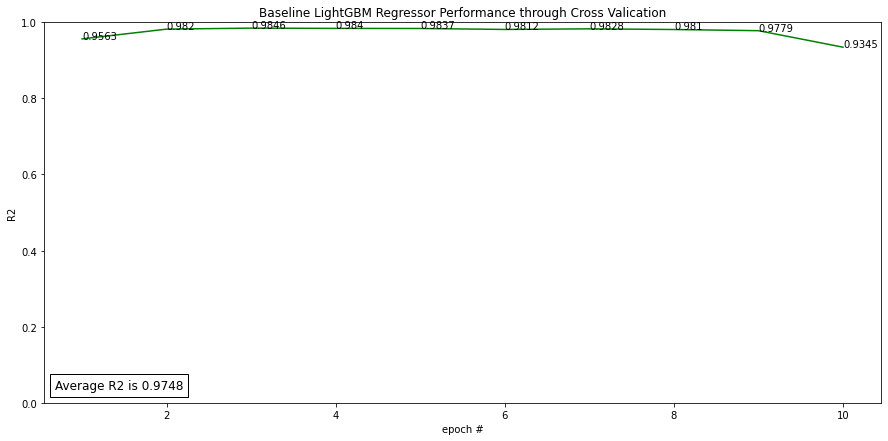

In [17]:
# baseline performance through cross validation
folds = StratifiedKFold(n_splits=10) 
lgbm = lgb.LGBMRegressor(objective='regression', random_state=10)  # by default, LGBM will recognize categorical features if you set the feature type as "category"
metrics_lst = []

for train_idx, val_idx in tqdm(folds.split(X, y), total=folds.get_n_splits()):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    
    lgbm.fit(X_train, y_train)
    y_pred = lgbm.predict(X_val)
    
    r2 = r2_score(y_val, y_pred)
    metrics_lst.append(r2)
    
plot_performance_lst(metrics_lst, 'R2', 'Baseline LightGBM Regressor Performance through Cross Valication')